In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Data 

In [2]:
import data

In [3]:
temp, dico = data.load_input_data('data/train_input.csv')

In [4]:
output = data.load_output_data('data/challenge_output.csv', temp, dico)

# --X--

In [5]:
f, keys = data.features(temp, dico['building_9_2'])

0.0% of feature extraction
11.446886446886447% of feature extraction
22.893772893772894% of feature extraction
34.34065934065934% of feature extraction
45.78754578754579% of feature extraction
57.234432234432234% of feature extraction
68.68131868131869% of feature extraction
80.12820512820514% of feature extraction
91.57509157509158% of feature extraction
done


In [6]:
r = output['building_9_2']

**--try neural net--**

In [18]:
from sklearn.neural_network import MLPRegressor

In [11]:
x_train = f[0:7000, :]
y_train = r[0:7000, 0]

x_test = f[7000:, :]
y_test = r[7000:, 0]

In [17]:
print(x_train.shape, y_train.shape)

(7000, 49) (7000,)


In [47]:
neural_net = MLPRegressor(hidden_layer_sizes=(300,), validation_fraction = 0.2, early_stopping = False,
                                   verbose = True, random_state = 777, learning_rate='constant',
                                   learning_rate_init=0.0001, tol=1e-6)

start = time.time()
neural_net.fit(x_train, y_train)
end = time.time()

print("Training time: " + str(end-start))

Iteration 1, loss = 56491.52585803
Iteration 2, loss = 1235.66085093
Iteration 3, loss = 36.57880184
Iteration 4, loss = 5.77355993
Iteration 5, loss = 5.40542756
Iteration 6, loss = 5.37539215
Iteration 7, loss = 5.35599518
Iteration 8, loss = 5.33640268
Iteration 9, loss = 5.31491241
Iteration 10, loss = 5.29202729
Iteration 11, loss = 5.26625146
Iteration 12, loss = 5.23296742
Iteration 13, loss = 5.21172743
Iteration 14, loss = 5.18572116
Iteration 15, loss = 5.15238551
Iteration 16, loss = 5.12156668
Iteration 17, loss = 5.10260242
Iteration 18, loss = 5.06267514
Iteration 19, loss = 5.03229777
Iteration 20, loss = 4.99894572
Iteration 21, loss = 4.96434577
Iteration 22, loss = 4.93726219
Iteration 23, loss = 4.91233306
Iteration 24, loss = 4.87657332
Iteration 25, loss = 4.84301090
Iteration 26, loss = 4.80635873
Iteration 27, loss = 4.78235275
Iteration 28, loss = 4.74327861
Iteration 29, loss = 4.70123759
Iteration 30, loss = 4.66469505
Iteration 31, loss = 4.63502169
Iteration

In [48]:
y_hat = neural_net.predict(x_test)

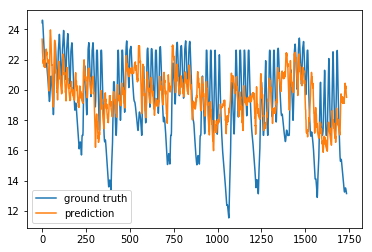

In [50]:
plt.figure()
plt.plot(y_test, label='ground truth')
plt.plot(y_hat, label='prediction')
plt.legend()
plt.show()

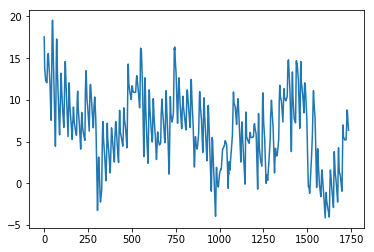

In [51]:
plt.figure()
plt.plot(x_test[:, 0])
plt.show()